In [1]:
import os, warnings
from pathlib import Path

import numpy as np
import dynamo as dyn
import spateo as st
import scanpy as sc
warnings.filterwarnings('ignore')

/home/pc001/anaconda3/envs/BioProjects/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/pc001/anaconda3/envs/BioProjects/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/pc001/anaconda3/envs/BioProjects/lib/python3.8/site-packag

## Load the data

In [2]:
sample_id = "E7_8h"
os.chdir(f"/media/pc001/Yao/Projects/Project_drosophila/Data_v4/migration-hotspot/drosophila_{sample_id}_germ_layer_new")
cpo = [(41, 1209, 57), (13, 8, -3), (0, 0, 1)]

out_image_path = f"image/amnioserosa_models"
Path(out_image_path).mkdir(parents=True, exist_ok=True)

In [3]:
import anndata as ad
tissue_adata = st.read_h5ad(f"h5ad/{sample_id}_mapping_amnioserosa.h5ad")
tissue_adata.obsm["3d_align_spatial"] = tissue_adata.obsm["tdr_spatial"]

tissue_pc, _ = st.tdr.construct_pc(
    adata=tissue_adata.copy(),
    spatial_key="3d_align_spatial",
    groupby="anno_tissue_new",
    key_added="tissue",
    colormap={"amnioserosa": "#bdcf32"},
)

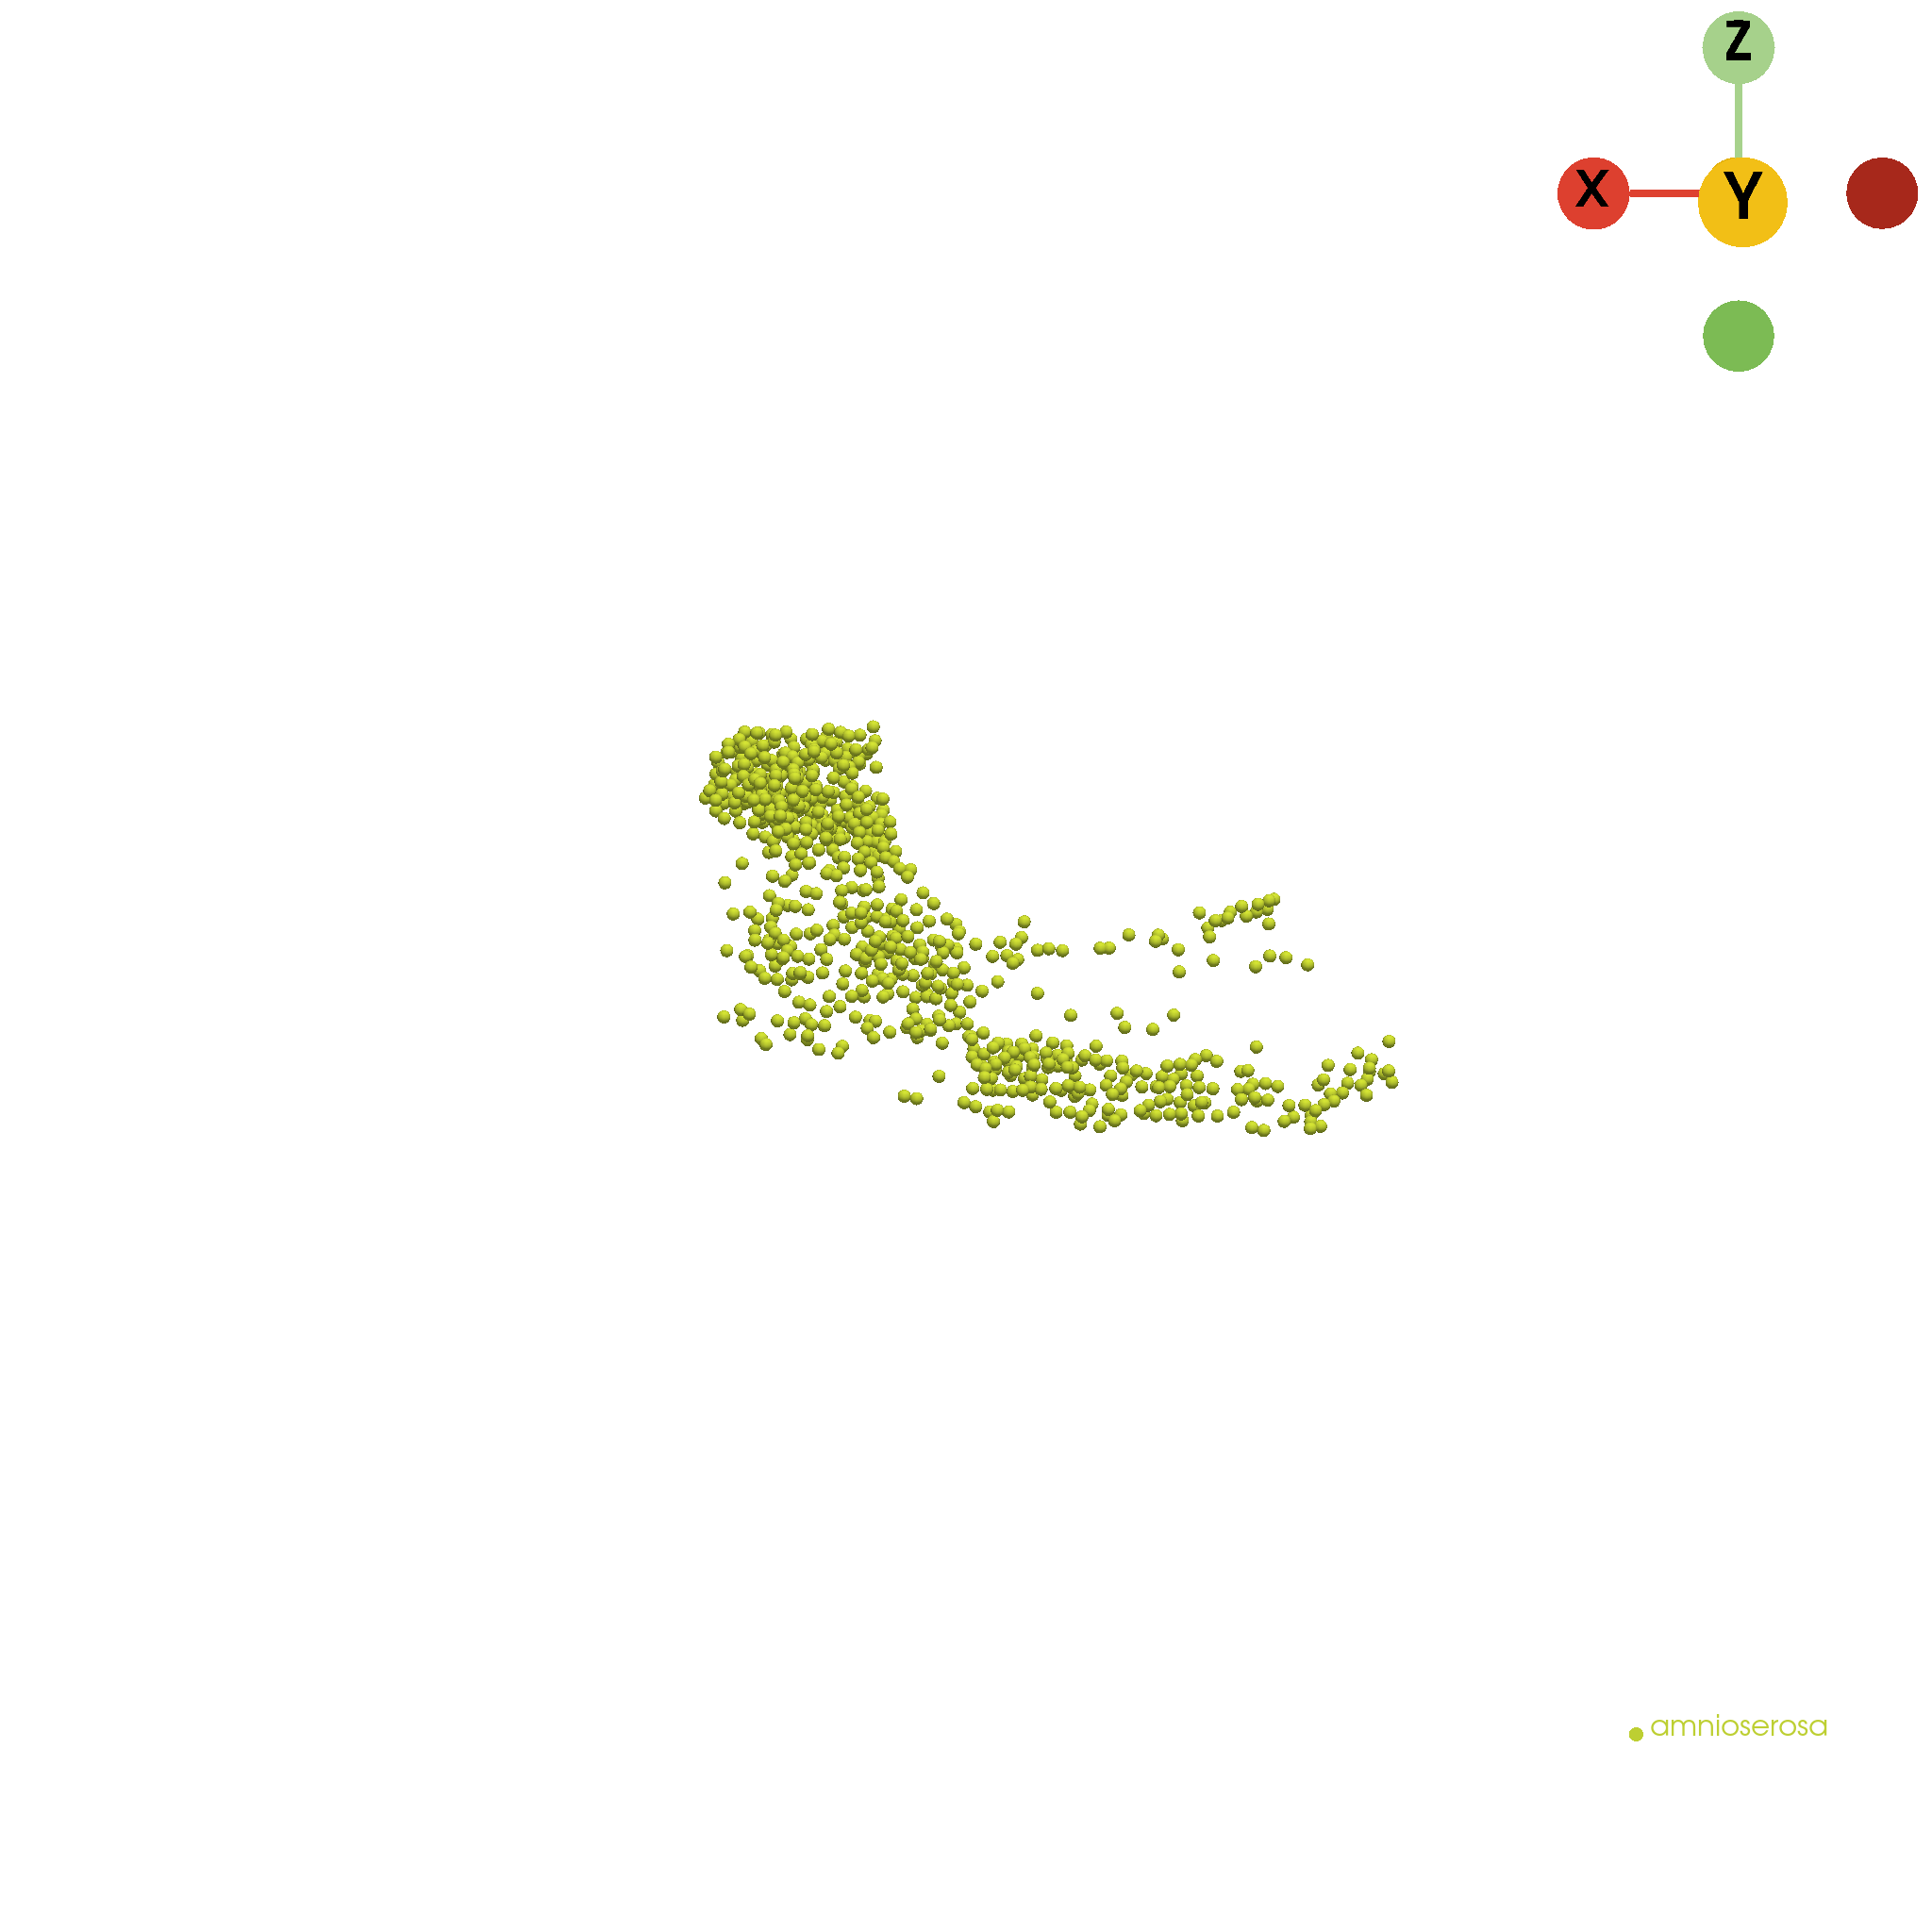

In [4]:
st.pl.three_d_plot(
    model=tissue_pc,
    key="tissue",
    model_style="points",
    model_size=14,
    cpo=cpo,
    window_size=(2048, 2048),
    jupyter="static",
    filename=os.path.join(out_image_path, f"{sample_id}_amnioserosa_pc_model_tissue.pdf")
)

In [5]:
import matplotlib.colors as mplc
tissue_color = mplc.to_hex(c=tissue_pc["tissue_rgba"][0], keep_alpha=True)
tissue_mesh, updated_tissue_pc, _ = st.tdr.construct_surface(
    pc=tissue_pc, key_added="tissue", label="amnioserosa", color=tissue_color, alpha=1,
    cs_method="marching_cube", cs_args={"mc_scale_factor": 0.77}, smooth=5000, scale_factor=1.)

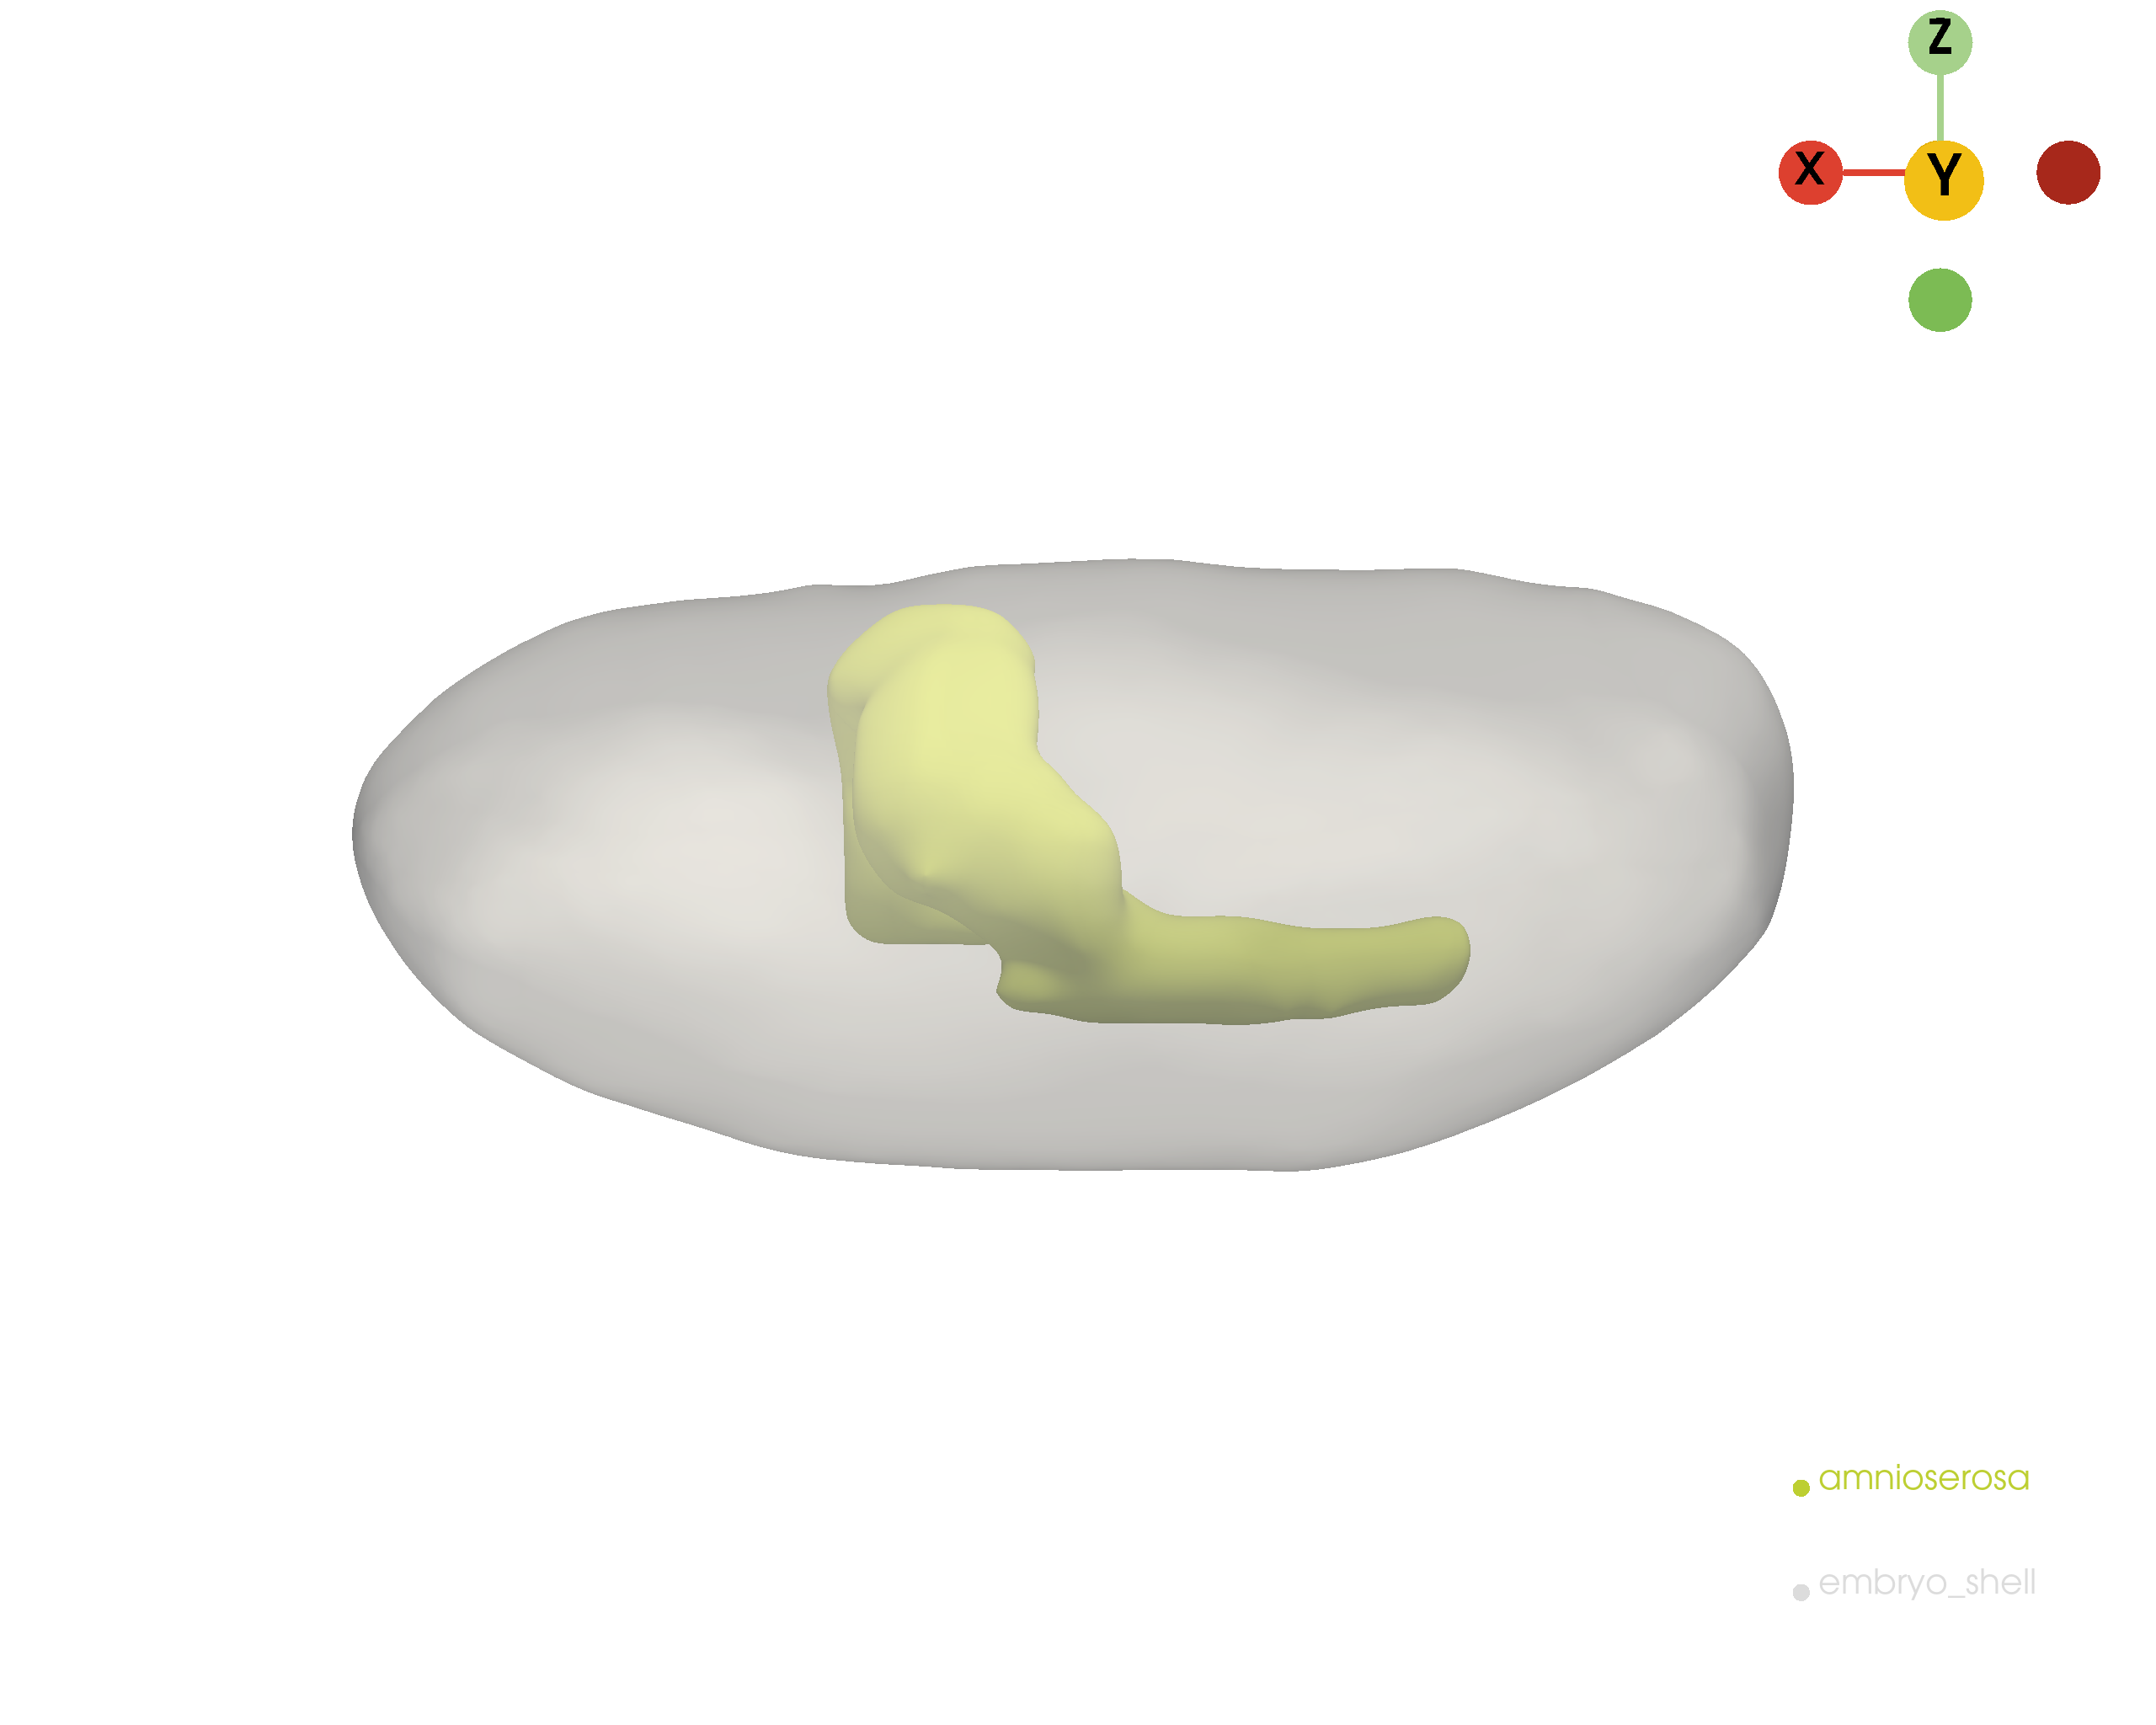

In [6]:
embryo_mesh = st.tdr.read_model(
    f"/media/pc001/Yao/Projects/Project_drosophila/Data_v4/migration-hotspot/drosophila_{sample_id}/mesh_models_new/0_Embryo_{sample_id}_aligned_mesh_model.vtk")
st.pl.three_d_plot(
    model=st.tdr.collect_models([embryo_mesh, tissue_mesh]),
    key="tissue",
    model_style="surface",
    opacity=[1, 1],
    # colormap=[None, "Spectral_r"],
    cpo=cpo,
    jupyter="static",
    window_size=(2560, 2048),
    filename=os.path.join(out_image_path, f"{sample_id}_amnioserosa_mesh_model.pdf")
)

## Save data

In [7]:
st.tdr.save_model(model=tissue_pc, filename=f"pc_models/Amnioserosa_{sample_id}_aligned_pc_model.vtk")
st.tdr.save_model(model=tissue_mesh, filename=f"mesh_models/Amnioserosa_{sample_id}_aligned_mesh_model.vtk")

obs_index = np.asarray(tissue_pc.point_data["obs_index"])
new_tissue_adata = tissue_adata[obs_index, :].copy()
new_tissue_adata.write_h5ad(f"h5ad/{sample_id}_amnioserosa.h5ad", compression="gzip")

In [8]:
new_tissue_adata

AnnData object with n_obs × n_vars = 769 × 6729
    obs: 'area', 'slices', 'anno_cell_type', 'anno_tissue', 'anno_germ_layer', 'actual_stage', 'scc', 'anno_tissue_new', 'V_z'
    uns: '__type'
    obsm: '2d_realign_spatial', '3d_align_spatial', 'V_cells_mapping', 'X_cells_mapping', 'X_pca', 'X_umap', 'raw_spatial', 'tdr_spatial'
    layers: 'X_counts', 'spliced', 'unspliced'